<a href="https://www.kaggle.com/code/soheybfarohe/fashion-mnist-classification?scriptVersionId=152458141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fashion-clothing-classification/__results__.html
/kaggle/input/fashion-clothing-classification/sample_image.png
/kaggle/input/fashion-clothing-classification/final_model.h5
/kaggle/input/fashion-clothing-classification/__resultx__.html
/kaggle/input/fashion-clothing-classification/__notebook__.ipynb
/kaggle/input/fashion-clothing-classification/__output__.json
/kaggle/input/fashion-clothing-classification/custom.css
/kaggle/input/fashion-clothing-classification/__results___files/__results___23_1.png
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
train_df =pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test_df =pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

In [3]:
train_df.head(30)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [4]:
train=train_df
test=test_df

In [5]:
train_df.label.unique

<bound method Series.unique of 0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64>

In [6]:
# Remove rows with missing target, separate target from predictors

train.dropna(axis=0, subset=['label'], inplace=True)
y_train=train.label
train.drop(['label'], axis=1, inplace=True)


In [7]:
test.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [8]:
# Remove rows with missing target, separate target from predictors
test
test.dropna(axis=0, subset=['label'], inplace=True)
y_valid=test.label
test.drop(['label'], axis=1, inplace=True)


In [9]:
test.shape

(10000, 784)

In [10]:
train.shape

(60000, 784)

In [11]:
import tensorflow.keras as keras
# Separate our our image vectors
x_train = train.values
x_valid = test.values

# Turn our scalar targets into binary categories
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [12]:
x_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [13]:
#building the CNN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(255, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=255, activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation="tanh"))
model.add(Dense(units=num_classes, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 255)       2550      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 255)      1020      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 255)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       293888    
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 128)      5

## DATA Augmentation

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

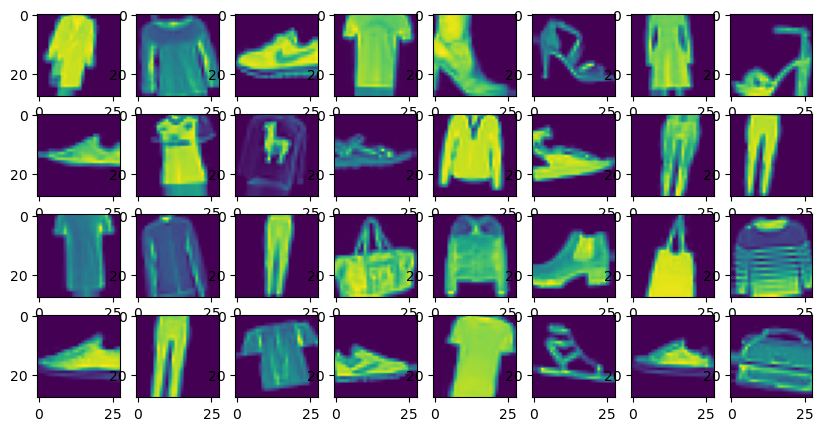

In [16]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8,figsize = (10, 5))
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [17]:
datagen.fit(x_train)

## Label---> description<br>
**0 : T-shirt/top<br>
1 : Trouser<br>
2 : Pullover<br>
3 : Dress<br>
4 : Coat<br>
5 : Sandal<br>
6 : Shirt<br>
7 : Sneaker<br>
8 : Bag<br>
9 : Ankle boot<br>**

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:

from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True)

In [20]:
history=model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size,
          validation_data=(x_valid, y_valid),
          callbacks=[early_stopping])

Epoch 1/20


2023-03-14 21:04:53.858053: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 38s 15ms/step - loss: 0.6667 - accuracy: 0.7453 - val_loss: 0.5288 - val_accuracy: 0.7973
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5126 - accuracy: 0.8066 - val_loss: 0.4948 - val_accuracy: 0.8124
Epoch 3/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4653 - accuracy: 0.8256 - val_loss: 0.3656 - val_accuracy: 0.8618
Epoch 4/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.4314 - accuracy: 0.8399 - val_loss: 0.3288 - val_accuracy: 0.8769
Epoch 5/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4080 - accuracy: 0.8478 - val_loss: 0.4006 - val_accuracy: 0.8382
Epoch 6/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3956 - accuracy: 0.8524 - val_loss: 0.3212 - val_accuracy: 0.8825
Epoch 7/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3891 - accuracy: 0.8534 - val_loss: 0.3240 - val_accura

In [21]:
print("ok")

ok


In [22]:
# retrain the CNN model for lower learning rate
opt = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
history1=model.fit(img_iter,
          epochs=10,
          steps_per_epoch=len(x_train)/batch_size,
          validation_data=(x_valid, y_valid),
          callbacks=[early_stopping])

Epoch 1/10


2023-03-14 21:13:36.992885: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 31s 15ms/step - loss: 0.3550 - accuracy: 0.8683 - val_loss: 0.4342 - val_accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3504 - accuracy: 0.8701 - val_loss: 0.2812 - val_accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3415 - accuracy: 0.8734 - val_loss: 0.2577 - val_accuracy: 0.9058
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3515 - accuracy: 0.8705 - val_loss: 0.2589 - val_accuracy: 0.9030
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3451 - accuracy: 0.8723 - val_loss: 0.3300 - val_accuracy: 0.8763
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3483 - accuracy: 0.8717 - val_loss: 0.2891 - val_accuracy: 0.8878
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3365 - accuracy: 0.8757 - val_loss: 0.3603 - val_accura

In [23]:
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Test loss: %.5f' % score[0])
print('Test accuracy %.2f' % score[1])

Test loss: 0.25773
Test accuracy 0.91


Minimum Validation Loss: 0.2577


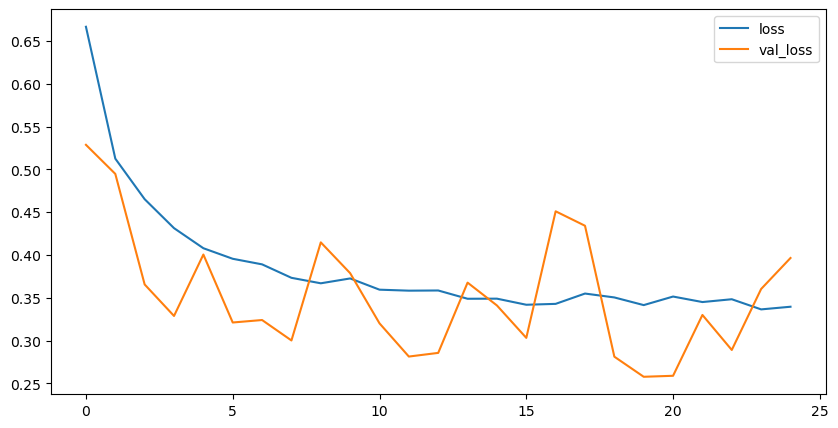

In [24]:
first_training_history_df = pd.DataFrame(history.history)
second_training_history_df = pd.DataFrame(history1.history)
full_history_df = pd.concat([first_training_history_df, second_training_history_df]
                            , ignore_index=True,axis=0, sort=False)
full_history_df.loc[:, ['loss', 'val_loss']].plot(figsize = (10, 5))
print("Minimum Validation Loss: {:0.4f}".format(full_history_df['val_loss'].min()))

In [25]:
model.save('My_Fashion_MNist_model_v2')

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, grayscale=True, target_size=(28, 28))
    image = image_utils.img_to_array(image)
    image = image.reshape(-1,28,28,1)
    image = image.astype('float32')
    image = image / 255.0
    preds = model.predict(image)
    return preds

In [27]:
labels = {
0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'ress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'
}

/opt/conda/lib/python3.7/site-packages/keras/utils/image_utils.py:410: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  'grayscale is deprecated. Please use color_mode = "grayscale"'


1/1 [==============================] - 0s 161ms/step


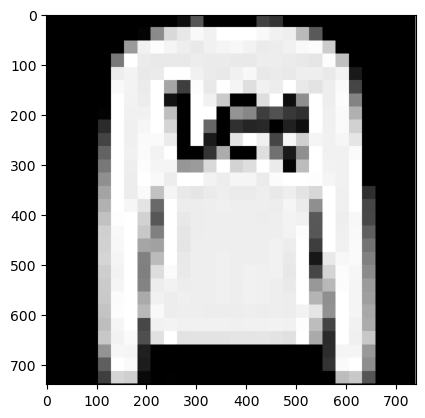

In [28]:
prdc=make_predictions('../input/fashion-clothing-classification/sample_image.png')

In [29]:
prdc

array([[2.1022239e-03, 3.9748793e-06, 9.9267238e-01, 1.5496991e-04,
        1.7186871e-03, 3.3432534e-06, 3.2121525e-03, 2.1186095e-06,
        1.2762842e-04, 2.5483978e-06]], dtype=float32)

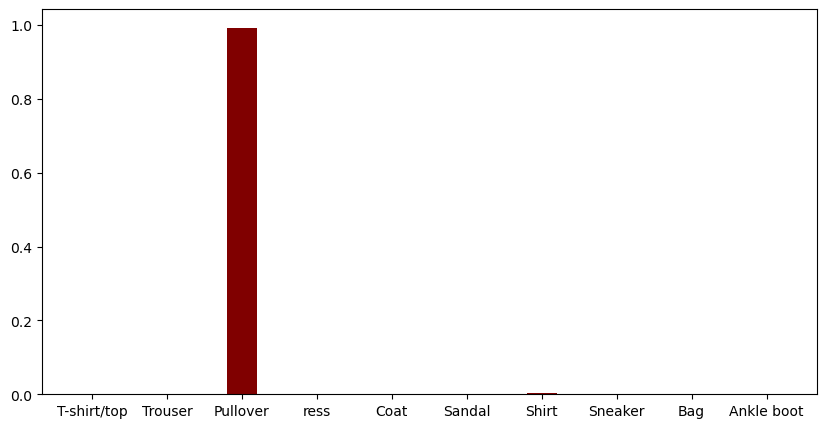

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(list(labels.values()), list(prdc[0]))
fig = plt.figure(figsize = (10, 5))
plt.bar(list(labels.values()), list(prdc[0]), color ='maroon',
        width = 0.4)
 
plt.show()

In [31]:
target =labels[np.argmax(prdc[0])]
print("result label is ",target)

result label is  Pullover


## **pretty nice our model did pridect the pullover properly**